In [13]:
!pip install torchviz==0.0.3 -q

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import dataloader, TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchviz import make_dot

#### Load dataset

In [15]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
iris = iris.drop(columns=['species'])
iris.head(), iris.shape, iris.dtypes, type(iris)

(   sepal_length  sepal_width  petal_length  petal_width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
 (150, 4),
 sepal_length    float64
 sepal_width     float64
 petal_length    float64
 petal_width     float64
 dtype: object,
 pandas.core.frame.DataFrame)

In [17]:
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
X, y

(     sepal_length  sepal_width  petal_length
 0             5.1          3.5           1.4
 1             4.9          3.0           1.4
 2             4.7          3.2           1.3
 3             4.6          3.1           1.5
 4             5.0          3.6           1.4
 ..            ...          ...           ...
 145           6.7          3.0           5.2
 146           6.3          2.5           5.0
 147           6.5          3.0           5.2
 148           6.2          3.4           5.4
 149           5.9          3.0           5.1
 
 [150 rows x 3 columns],
 0      0.2
 1      0.2
 2      0.2
 3      0.2
 4      0.2
       ... 
 145    2.3
 146    1.9
 147    2.0
 148    2.3
 149    1.8
 Name: petal_width, Length: 150, dtype: float64)

# Visualize each feature

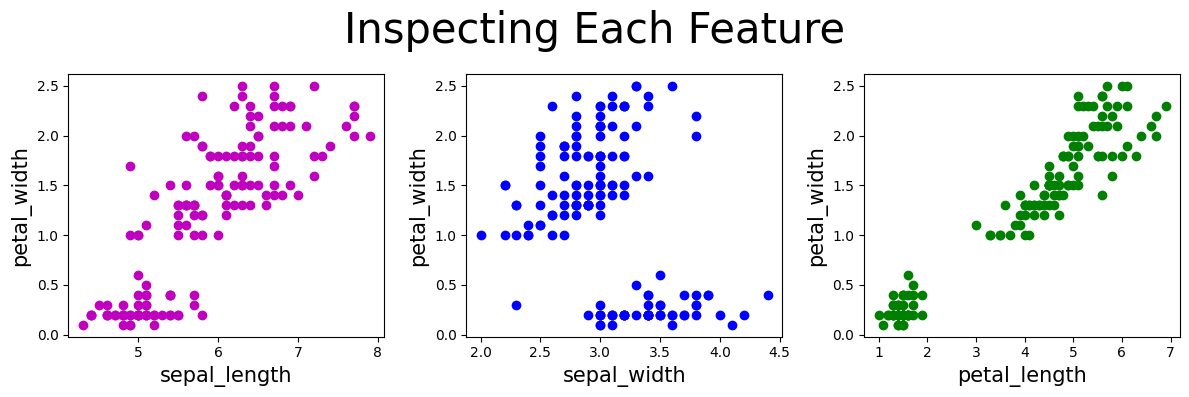

In [18]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0].plot(X['sepal_length'],y,'mo')
axes[0].set_ylabel("petal_width", fontsize = 15)
axes[0].set_xlabel("sepal_length", fontsize = 15)

axes[1].plot(X['sepal_width'],y,'bo')
axes[1].set_ylabel("petal_width", fontsize = 15)
axes[1].set_xlabel("sepal_width", fontsize = 15)


axes[2].plot(X['petal_length'],y,'go')
axes[2].set_ylabel('petal_width', fontsize = 15)
axes[2].set_xlabel("petal_length", fontsize = 15)

plt.tight_layout()

In [19]:
y = y.values.reshape(-1, 1)
y

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

#### Train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Data Standardization

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Transform to pytorch

In [22]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

#### Create Neural Network

In [23]:
model = nn.Sequential(
    nn.Linear(3, 1)
)
model

Sequential(
  (0): Linear(in_features=3, out_features=1, bias=True)
)

#### Visualize computation graph (before training)

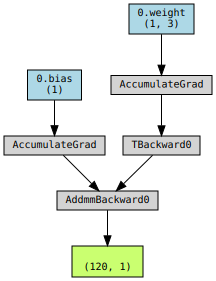

In [24]:
ypred = model(X_train)
make_dot(ypred, params=dict(model.named_parameters()))

In [25]:
learningRate = 0.001
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate,)

In [26]:
epochs = 1001
losses = torch.zeros(epochs)

for epoch in range(epochs):
    # Forward propagation
    ypred = model(X_train)
    loss = lossfunc(ypred, y_train)
    # Record the loss
    losses[epoch] = loss.detach()

    # Backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if epoch % 100 == 0:
        print(f'Epoch: {epoch}; Loss: {loss.item():.4f}')

Epoch: 0; Loss: 2.6578
Epoch: 100; Loss: 1.3687
Epoch: 200; Loss: 0.7488
Epoch: 300; Loss: 0.4420
Epoch: 400; Loss: 0.2848
Epoch: 500; Loss: 0.2007
Epoch: 600; Loss: 0.1537
Epoch: 700; Loss: 0.1260
Epoch: 800; Loss: 0.1090
Epoch: 900; Loss: 0.0979
Epoch: 1000; Loss: 0.0905


In [27]:
ypred

tensor([[-2.7200e-02],
        [ 3.2043e-01],
        [ 1.5367e+00],
        [ 2.0836e-01],
        [ 3.9830e-02],
        [ 1.6314e+00],
        [ 1.4278e+00],
        [ 3.1449e-01],
        [ 2.0116e-01],
        [ 1.9653e-01],
        [ 1.4298e+00],
        [ 1.2422e+00],
        [ 1.5982e+00],
        [ 2.6797e-01],
        [ 3.4832e-01],
        [ 1.0918e+00],
        [ 1.5930e+00],
        [ 1.6526e+00],
        [ 1.5198e+00],
        [ 1.9700e+00],
        [ 1.1692e+00],
        [ 2.3369e+00],
        [ 1.1745e+00],
        [ 2.5740e-01],
        [ 2.4333e+00],
        [ 1.2246e+00],
        [ 3.1363e-01],
        [ 2.0031e-01],
        [ 3.0100e-01],
        [ 9.4652e-01],
        [ 1.5716e+00],
        [ 2.6990e-01],
        [ 3.6015e-01],
        [ 3.5826e-01],
        [ 1.1720e+00],
        [ 2.9757e-01],
        [ 1.1496e+00],
        [ 2.2367e+00],
        [ 1.3350e-01],
        [ 1.3726e+00],
        [ 1.4120e+00],
        [ 2.6609e-01],
        [ 1.3824e+00],
        [ 1

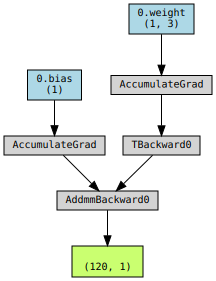

In [28]:
# Visualize computation graph (after training)
make_dot(ypred, params=dict(model.named_parameters()))

### Nodes
- 0.weight (1, 3): Represents the weights of the layer (nn.Linear). The dimensions (1, 3) indicate 1 output neuron and 3 input features.
- 0.bias (1): Represents the bias term of the layer. A bias is a scalar value added to the output of the weighted sum.
- AccumulateGrad Nodes: These are used to accumulate gradients during backpropagation. Gradients computed for 0.weight and 0.bias during the backward pass are stored here.
- TBackward0: This is part of the backward pass for the weight tensor. It represents the gradient of the loss with respect to the weights.
- AddmmBackward0: This node handles the matrix multiplication and addition operation during the backward pass. Addmm is short for "add matrix multiplication," 
which calculates: 𝑌 = 𝑊(𝑇) * 𝑋 + 𝑏
    - where: 
        - 𝑋: X is the input tensor.
        - 𝑊: W is the weight tensor.
        - 𝑏: b is the bias term.
- Output Node (120, 1): Represents the output of the layer. The shape (120, 1) shows there are 120 samples in the batch, each producing 1 output value (because there is 1 neuron in the layer).

#### Flow of the Graph:
- Forward Pass: 
    - The input tensor 𝑋 (not shown here) interacts with 0.weight and 0.bias.
    - The computation 𝑌 = 𝑊(𝑇) * 𝑋 + 𝑏 produces the output (120, 1).
- Backward Pass:
    - During backpropagation, gradients of the loss with respect to 0.weight and 0.bias are computed.
    - These gradients flow through the AccumulateGrad, TBackward0, and AddmmBackward0 nodes.


#### Loss vs Epoch

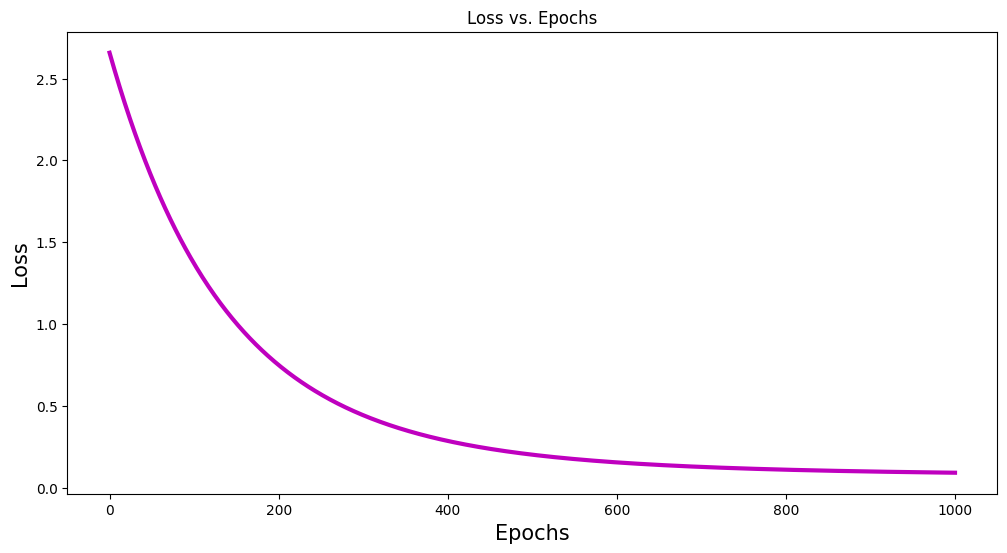

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw=3)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Loss vs. Epochs')
plt.show()

#### Weights and Bias of training model

In [30]:
# We have only 1 layer
print(f"Trained Weight: {model[0].weight.detach().numpy()}")
print(f"Trained Bias: {model[0].bias.detach().numpy()}")

Trained Weight: [[ 0.3000164  -0.08792764  0.35812864]]
Trained Bias: [1.0804738]


#### Testing and evaluating the model

In [31]:
y_pred = model(X_test)
y_pred = y_pred.detach().numpy()
y_test = y_test.detach().numpy()

In [32]:
#### Performance
from sklearn import metrics
print(f'Training Data RMSE: {np.sqrt(metrics.mean_squared_error(y_pred, y_test)):.4f}')
print(f'Training Data MAE: {metrics.mean_absolute_error(y_pred, y_test):.4f}')
print(f'Training Data R²: {metrics.r2_score(y_pred, y_test):.4f}')

Training Data RMSE: 0.2738
Training Data MAE: 0.2198
Training Data R²: 0.8412


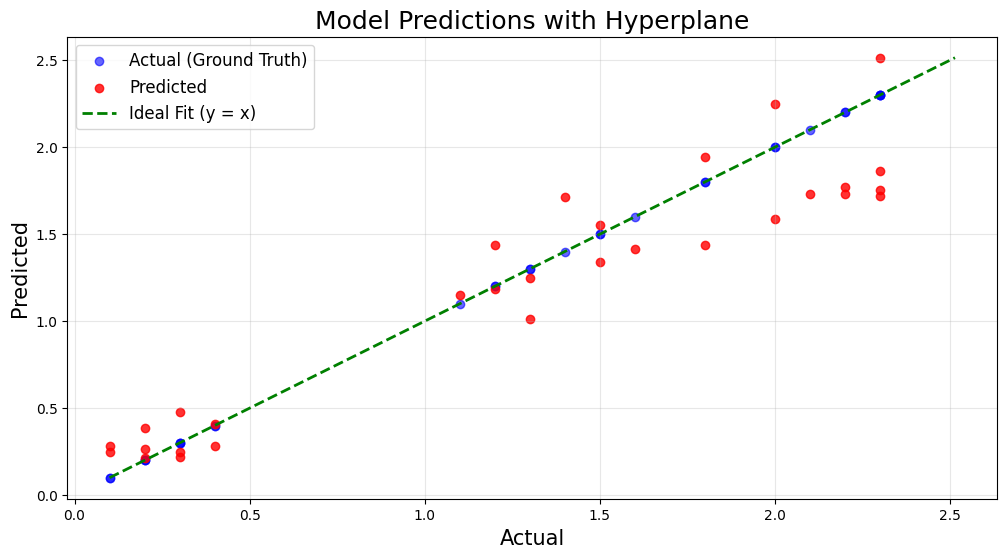

In [33]:
plt.figure(figsize=(12, 6))

# Scatter actual values in the background
plt.scatter(y_test, y_test, c='b', label='Actual (Ground Truth)', alpha=0.6)

# Scatter predicted vs actual values
plt.scatter(y_test, y_pred, c='r', label='Predicted', alpha=0.8)

# Add a hyperplane for y = x (perfect prediction line)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'g--', lw=2, label='Ideal Fit (y = x)')

# Customize plot
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title('Model Predictions with Hyperplane', fontsize=18)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()